In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%cd  /home/msadmin/courses/deeplearning1/nbs/data/iceberg

/home/msadmin/courses/deeplearning1/nbs/data/iceberg


In [3]:
#Create references to important directories we will use over and over
import os, sys
current_dir = os.getcwd()
LESSON_HOME_DIR = current_dir
DATA_HOME_DIR = current_dir + '/data/'

In [4]:
#Allow relative imports to directories above lesson1/
sys.path.insert(1, os.path.join(sys.path[0], '..'))

#import modules
from utils import *
from vgg16 import Vgg16

#Instantiate plotting tool
#In Jupyter notebooks, you will need to run this command before doing any plotting
%matplotlib inline

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/msadmin/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using Theano backend.


In [ ]:
#Create directories
%cd $DATA_HOME_DIR
%mkdir -p valid
%mkdir -p results
%mkdir -p train

In [ ]:
#Divide iceberg/ship images into separate directories

%cd $DATA_HOME_DIR/valid
%mkdir -p iceberg
%mkdir -p ship

%cd $DATA_HOME_DIR/train
%mkdir -p iceberg
%mkdir -p ship

In [124]:
%cd $DATA_HOME_DIR/processed
train_df = pd.read_json("train.json")
test_df = pd.read_json("test.json")

/home/msadmin/courses/deeplearning1/nbs/data/iceberg/data/processed


In [120]:
%cd $DATA_HOME_DIR/train

/home/msadmin/courses/deeplearning1/nbs/data/iceberg/data/train


In [121]:
test_df.size

33696

In [122]:
def convert_to_jpg():
    import cv2

    # fig = plt.gcf()
    print("train_df.size",len(train_df))
    for ix, row in train_df.iterrows():
        img = np.array(row['band_1']).reshape((75, 75))

        img2 = np.array(row['band_2']).reshape((75, 75))
        img3 = img + img2
        img3 -= img3.min()
        img3 /= img3.max()
        img3 *= 255
        #plt.imshow(img3)
        img3 = img3.astype(np.uint8)
        if row['is_iceberg']==0:

            cv2.imwrite("ship/f{}.png".format(ix), img3)
            # fig.savefig("../input/train/0/f{}.png".format(ix), dpi=100)
        elif row['is_iceberg']==1:
            cv2.imwrite("iceberg/f{}.png".format(ix), img3)

In [125]:
convert_to_jpg()

('train_df.size', 1604)


In [5]:
%cd $DATA_HOME_DIR/processed
test_df = pd.read_json("test.json")

/home/msadmin/courses/deeplearning1/nbs/data/iceberg/data/processed


In [ ]:
%cd $DATA_HOME_DIR/test

In [ ]:
test_df.head()

In [128]:
def convert_test_to_png():
    import cv2

    # fig = plt.gcf()
    print("test_df.size",len(test_df))
    for ix, row in test_df.iterrows():
        img = np.array(row['band_1']).reshape((75, 75))

        img2 = np.array(row['band_2']).reshape((75, 75))
        img3 = img + img2
        img3 -= img3.min()
        img3 /= img3.max()
        img3 *= 255
        plt.imshow(img3)
        img3 = img3.astype(np.uint8)
        img_name = row['id']
        cv2.imwrite("unknown/"+ img_name + ".png" , img3)

In [152]:
def convert_single_to_png():
    import cv2

    # fig = plt.gcf()
    #print("test_df.size",len(test_df))
    for ix, row in test_df[0:1].iterrows():
        img = np.array(row['band_1']).reshape((75, 75))

        img2 = np.array(row['band_2']).reshape((75, 75))
        img3 = img + img2
        img3 -= img3.min()
        img3 /= img3.max()
        img3 *= 255
        
        img3 = img3.astype(np.uint8)
        img3 = ndimage.gaussian_filter(img3, sigma=3)
        plt.imshow(img3)
        img_name = row['id']
        #cv2.imwrite("unknown/"+ img_name + ".png" , img3)

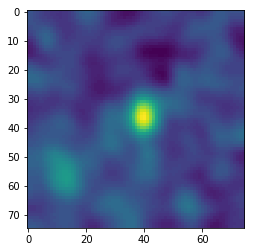

In [153]:
#test_df[0:1]
convert_single_to_png()
#%mv *.png unknown/

In [149]:
?ndimage.gaussian_filter

## Alternative to converting to png -

In [ ]:
X_band_1=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_1"]])
X_band_2=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_2"]])
X_band_3=(X_band_1+X_band_2)/2
#X_band_3=np.array([np.full((75, 75), angel).astype(np.float32) for angel in train["inc_angle"]])
X_train = np.concatenate([X_band_1[:, :, :, np.newaxis]
                          , X_band_2[:, :, :, np.newaxis]
                         , X_band_3[:, :, :, np.newaxis]], axis=-1)


In [ ]:
X_band_test_1=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in test["band_1"]])
X_band_test_2=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in test["band_2"]])
X_band_test_3=(X_band_test_1+X_band_test_2)/2
#X_band_test_3=np.array([np.full((75, 75), angel).astype(np.float32) for angel in test["inc_angle"]])
X_test = np.concatenate([X_band_test_1[:, :, :, np.newaxis]
                          , X_band_test_2[:, :, :, np.newaxis]
                         , X_band_test_3[:, :, :, np.newaxis]], axis=-1)


In [ ]:
%cd $DATA_HOME_DIR/train/iceberg
g = glob('*.png')
shuf = np.random.permutation(g)
for i in range(len(g)/3): os.rename(shuf[i], DATA_HOME_DIR+'/valid/iceberg/' + shuf[i])

In [ ]:
%cd $DATA_HOME_DIR/train/ship
g = glob('*.png')
shuf = np.random.permutation(g)
for i in range(len(g)/3): os.rename(shuf[i], DATA_HOME_DIR+'/valid/ship/' + shuf[i])

## Setup batches

In [ ]:
train_df

In [6]:
batch_size=64

In [7]:
batches = get_batches(DATA_HOME_DIR+'train', batch_size=batch_size)
val_batches = get_batches(DATA_HOME_DIR+'valid', batch_size=batch_size*2, shuffle=False)

Found 714 images belonging to 2 classes.
Found 356 images belonging to 2 classes.


In [8]:
type(batches)

keras.preprocessing.image.DirectoryIterator

In [9]:
(val_classes, trn_classes, val_labels, trn_labels, 
    val_filenames, filenames, test_filenames) = get_classes(DATA_HOME_DIR)

Found 714 images belonging to 2 classes.
Found 356 images belonging to 2 classes.
Found 8424 images belonging to 1 classes.


## Single conv layer

In [10]:
def conv1(batches, ep, lr):
    model = Sequential([
            BatchNormalization(axis=1, input_shape=(3, 224, 224)),
            Convolution2D(32,3,3, activation='relu'),
            BatchNormalization(axis=1),
            MaxPooling2D((3,3)),
            Convolution2D(64,3,3, activation='relu'),
            BatchNormalization(axis=1),
            MaxPooling2D((3,3)),
            Flatten(),
            Dense(200, activation='relu'),
            BatchNormalization(),
            Dense(2, activation='softmax')
        ])

    model.compile(Adam(lr=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
    model.optimizer.lr = lr
    model.fit_generator(batches, batches.nb_sample, nb_epoch=ep, validation_data=val_batches, 
                     nb_val_samples=val_batches.nb_sample)
    return model

In [11]:
model = conv1(batches, 5, 0.01)

Epoch 1/5
714/714 [==============================] - 16s - loss: 1.4224 - acc: 0.6092 - val_loss: 4.6450 - val_acc: 0.5197
Epoch 2/5
714/714 [==============================] - 15s - loss: 0.5062 - acc: 0.7577 - val_loss: 5.6145 - val_acc: 0.4410
Epoch 3/5
714/714 [==============================] - 16s - loss: 0.3990 - acc: 0.8067 - val_loss: 4.4337 - val_acc: 0.4691
Epoch 4/5
714/714 [==============================] - 16s - loss: 0.3360 - acc: 0.8389 - val_loss: 4.7505 - val_acc: 0.4719
Epoch 5/5
714/714 [==============================] - 16s - loss: 0.3049 - acc: 0.8571 - val_loss: 3.9861 - val_acc: 0.4775


In [12]:
#cnmem=.75
model = conv1(batches, 5, 0.001)

Epoch 1/5
714/714 [==============================] - 16s - loss: 1.1794 - acc: 0.7171 - val_loss: 8.2849 - val_acc: 0.4691
Epoch 2/5
714/714 [==============================] - 16s - loss: 0.4177 - acc: 0.8235 - val_loss: 1.1919 - val_acc: 0.4663
Epoch 3/5
714/714 [==============================] - 16s - loss: 0.3182 - acc: 0.8641 - val_loss: 1.7427 - val_acc: 0.4691
Epoch 4/5
714/714 [==============================] - 15s - loss: 0.2147 - acc: 0.9272 - val_loss: 1.0923 - val_acc: 0.5365
Epoch 5/5
714/714 [==============================] - 16s - loss: 0.1539 - acc: 0.9552 - val_loss: 0.6296 - val_acc: 0.7275


In [13]:
model = conv1(batches, 5, 0.0001)

Epoch 1/5
714/714 [==============================] - 17s - loss: 0.7464 - acc: 0.7395 - val_loss: 2.9751 - val_acc: 0.4691
Epoch 2/5
714/714 [==============================] - 15s - loss: 0.3721 - acc: 0.8515 - val_loss: 0.7921 - val_acc: 0.5365
Epoch 3/5
714/714 [==============================] - 16s - loss: 0.1929 - acc: 0.9426 - val_loss: 0.8997 - val_acc: 0.5393
Epoch 4/5
714/714 [==============================] - 16s - loss: 0.1167 - acc: 0.9818 - val_loss: 0.9385 - val_acc: 0.5309
Epoch 5/5
714/714 [==============================] - 16s - loss: 0.0711 - acc: 0.9916 - val_loss: 1.3817 - val_acc: 0.5309


In [17]:
model = conv1(batches, 10, 0.00001)

Epoch 1/10
714/714 [==============================] - 17s - loss: 0.7367 - acc: 0.6821 - val_loss: 0.7350 - val_acc: 0.5140
Epoch 2/10
714/714 [==============================] - 15s - loss: 0.5066 - acc: 0.7689 - val_loss: 0.6735 - val_acc: 0.5730
Epoch 3/10
714/714 [==============================] - 16s - loss: 0.3403 - acc: 0.8403 - val_loss: 0.6728 - val_acc: 0.5702
Epoch 4/10
714/714 [==============================] - 16s - loss: 0.2536 - acc: 0.9006 - val_loss: 0.7166 - val_acc: 0.5337
Epoch 5/10
714/714 [==============================] - 16s - loss: 0.1989 - acc: 0.9468 - val_loss: 0.6582 - val_acc: 0.5787
Epoch 6/10
714/714 [==============================] - 17s - loss: 0.1846 - acc: 0.9370 - val_loss: 0.7628 - val_acc: 0.5309
Epoch 7/10
714/714 [==============================] - 17s - loss: 0.1277 - acc: 0.9832 - val_loss: 0.7112 - val_acc: 0.5365
Epoch 8/10
714/714 [==============================] - 16s - loss: 0.1035 - acc: 0.9902 - val_loss: 0.6859 - val_acc: 0.5393
Epoch 9/

In [15]:
model = conv1(batches, 5, 0.000001)

Epoch 1/5
714/714 [==============================] - 16s - loss: 0.7739 - acc: 0.6415 - val_loss: 1.9265 - val_acc: 0.5309
Epoch 2/5
714/714 [==============================] - 16s - loss: 0.7758 - acc: 0.6471 - val_loss: 1.4214 - val_acc: 0.5281
Epoch 3/5
714/714 [==============================] - 16s - loss: 0.6558 - acc: 0.6905 - val_loss: 1.2920 - val_acc: 0.5281
Epoch 4/5
714/714 [==============================] - 16s - loss: 0.5884 - acc: 0.7129 - val_loss: 1.1416 - val_acc: 0.5197
Epoch 5/5
714/714 [==============================] - 16s - loss: 0.6144 - acc: 0.7129 - val_loss: 1.0591 - val_acc: 0.5197


In [16]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
batchnormalization_17 (BatchNorm (None, 3, 224, 224)   12          batchnormalization_input_5[0][0] 
____________________________________________________________________________________________________
convolution2d_9 (Convolution2D)  (None, 32, 222, 222)  896         batchnormalization_17[0][0]      
____________________________________________________________________________________________________
batchnormalization_18 (BatchNorm (None, 32, 222, 222)  128         convolution2d_9[0][0]            
____________________________________________________________________________________________________
maxpooling2d_9 (MaxPooling2D)    (None, 32, 74, 74)    0           batchnormalization_18[0][0]      
___________________________________________________________________________________________

## Data augmentation

In [28]:
?image.ImageDataGenerator

In [ ]:
gen_t = image.ImageDataGenerator(rotation_range=15, height_shift_range=0.05, 
                shear_range=0.1, channel_shift_range=20, width_shift_range=0.1)
batches = get_batches(DATA_HOME_DIR+'train', gen_t, batch_size=batch_size)

In [118]:
?image.ImageDataGenerator

In [30]:
gen_t = image.ImageDataGenerator(rotation_range=15)
model.optimizer.lr=0.00001
batches = get_batches(DATA_HOME_DIR+'train', gen_t, batch_size=batch_size)
model.fit_generator(batches, batches.nb_sample, nb_epoch=5, validation_data=val_batches, 
                 nb_val_samples=val_batches.nb_sample)

Found 714 images belonging to 2 classes.
Epoch 1/10
714/714 [==============================] - 25s - loss: 0.6106 - acc: 0.7745 - val_loss: 0.7464 - val_acc: 0.6039
Epoch 2/10
714/714 [==============================] - 25s - loss: 0.6092 - acc: 0.7773 - val_loss: 0.7544 - val_acc: 0.6236
Epoch 3/10
714/714 [==============================] - 26s - loss: 0.6140 - acc: 0.7647 - val_loss: 0.7691 - val_acc: 0.6124
Epoch 4/10
714/714 [==============================] - 25s - loss: 0.6587 - acc: 0.7661 - val_loss: 0.7114 - val_acc: 0.6685
Epoch 5/10
714/714 [==============================] - 26s - loss: 0.6066 - acc: 0.7717 - val_loss: 0.6766 - val_acc: 0.6742
Epoch 6/10
714/714 [==============================] - 26s - loss: 0.5535 - acc: 0.7689 - val_loss: 0.6374 - val_acc: 0.6938
Epoch 7/10
714/714 [==============================] - 26s - loss: 0.5812 - acc: 0.7815 - val_loss: 0.6181 - val_acc: 0.7107
Epoch 8/10
714/714 [==============================] - 26s - loss: 0.5366 - acc: 0.8011 - va

In [31]:
gen_t = image.ImageDataGenerator(rotation_range=5)
model.optimizer.lr=0.00001
batches = get_batches(DATA_HOME_DIR+'train', gen_t, batch_size=batch_size)
model.fit_generator(batches, batches.nb_sample, nb_epoch=5, validation_data=val_batches, 
                 nb_val_samples=val_batches.nb_sample)

Found 714 images belonging to 2 classes.
Epoch 1/5
714/714 [==============================] - 26s - loss: 0.4202 - acc: 0.8347 - val_loss: 0.5934 - val_acc: 0.7135
Epoch 2/5
714/714 [==============================] - 26s - loss: 0.4365 - acc: 0.8459 - val_loss: 0.5942 - val_acc: 0.7275
Epoch 3/5
714/714 [==============================] - 25s - loss: 0.4133 - acc: 0.8403 - val_loss: 0.5998 - val_acc: 0.7275
Epoch 4/5
714/714 [==============================] - 26s - loss: 0.4366 - acc: 0.8347 - val_loss: 0.5673 - val_acc: 0.7303
Epoch 5/5
714/714 [==============================] - 26s - loss: 0.4557 - acc: 0.8333 - val_loss: 0.5450 - val_acc: 0.7500


In [32]:
gen_t = image.ImageDataGenerator(rotation_range=10)
model.optimizer.lr=0.00001
batches = get_batches(DATA_HOME_DIR+'train', gen_t, batch_size=batch_size)
model.fit_generator(batches, batches.nb_sample, nb_epoch=5, validation_data=val_batches, 
                 nb_val_samples=val_batches.nb_sample)

Found 714 images belonging to 2 classes.
Epoch 1/5
714/714 [==============================] - 26s - loss: 0.4926 - acc: 0.8095 - val_loss: 0.5251 - val_acc: 0.7612
Epoch 2/5
714/714 [==============================] - 25s - loss: 0.3951 - acc: 0.8571 - val_loss: 0.5050 - val_acc: 0.7781
Epoch 3/5
714/714 [==============================] - 25s - loss: 0.4532 - acc: 0.8235 - val_loss: 0.4841 - val_acc: 0.7725
Epoch 4/5
714/714 [==============================] - 26s - loss: 0.3752 - acc: 0.8445 - val_loss: 0.4730 - val_acc: 0.7893
Epoch 5/5
714/714 [==============================] - 26s - loss: 0.4341 - acc: 0.8347 - val_loss: 0.4798 - val_acc: 0.7893


In [34]:
gen_t = image.ImageDataGenerator(rotation_range=25)
model.optimizer.lr=0.00001
batches = get_batches(DATA_HOME_DIR+'train', gen_t, batch_size=batch_size)
model.fit_generator(batches, batches.nb_sample, nb_epoch=5, validation_data=val_batches, 
                 nb_val_samples=val_batches.nb_sample)

Found 714 images belonging to 2 classes.
Epoch 1/5
714/714 [==============================] - 26s - loss: 0.5543 - acc: 0.7815 - val_loss: 0.4400 - val_acc: 0.7949
Epoch 2/5
714/714 [==============================] - 26s - loss: 0.5506 - acc: 0.7871 - val_loss: 0.4282 - val_acc: 0.8062
Epoch 3/5
714/714 [==============================] - 26s - loss: 0.5445 - acc: 0.7885 - val_loss: 0.4301 - val_acc: 0.8090
Epoch 4/5
714/714 [==============================] - 25s - loss: 0.4526 - acc: 0.8249 - val_loss: 0.4618 - val_acc: 0.7781
Epoch 5/5
714/714 [==============================] - 26s - loss: 0.4598 - acc: 0.8305 - val_loss: 0.4455 - val_acc: 0.8118


In [35]:
gen_t = image.ImageDataGenerator(rotation_range=30)
model.optimizer.lr=0.00001
batches = get_batches(DATA_HOME_DIR+'train', gen_t, batch_size=batch_size)
model.fit_generator(batches, batches.nb_sample, nb_epoch=5, validation_data=val_batches, 
                 nb_val_samples=val_batches.nb_sample)

Found 714 images belonging to 2 classes.
Epoch 1/5
714/714 [==============================] - 27s - loss: 0.4906 - acc: 0.8123 - val_loss: 0.4171 - val_acc: 0.8006
Epoch 2/5
714/714 [==============================] - 25s - loss: 0.5953 - acc: 0.7829 - val_loss: 0.4059 - val_acc: 0.8202
Epoch 3/5
714/714 [==============================] - 26s - loss: 0.5134 - acc: 0.7983 - val_loss: 0.4025 - val_acc: 0.8090
Epoch 4/5
714/714 [==============================] - 26s - loss: 0.5931 - acc: 0.7703 - val_loss: 0.4692 - val_acc: 0.8090
Epoch 5/5
714/714 [==============================] - 26s - loss: 0.5119 - acc: 0.7997 - val_loss: 0.4894 - val_acc: 0.8062


In [105]:
gen_t = image.ImageDataGenerator(rotation_range=40)
model.optimizer.lr=0.00001
batches = get_batches(DATA_HOME_DIR+'train', gen_t, batch_size=batch_size)
model.fit_generator(batches, batches.nb_sample, nb_epoch=5, validation_data=val_batches, 
                 nb_val_samples=val_batches.nb_sample)

Found 714 images belonging to 2 classes.
Epoch 1/5
714/714 [==============================] - 26s - loss: 0.5921 - acc: 0.7759 - val_loss: 0.4356 - val_acc: 0.8090
Epoch 2/5
714/714 [==============================] - 26s - loss: 0.5242 - acc: 0.8053 - val_loss: 0.4187 - val_acc: 0.8062
Epoch 3/5
714/714 [==============================] - 25s - loss: 0.5430 - acc: 0.7731 - val_loss: 0.4303 - val_acc: 0.7978
Epoch 4/5
714/714 [==============================] - 26s - loss: 0.4930 - acc: 0.7955 - val_loss: 0.4453 - val_acc: 0.7949
Epoch 5/5
714/714 [==============================] - 26s - loss: 0.5663 - acc: 0.7829 - val_loss: 0.4298 - val_acc: 0.7921


In [106]:
gen_t = image.ImageDataGenerator(height_shift_range=0.05)
model.optimizer.lr=0.00001
batches = get_batches(DATA_HOME_DIR+'train', gen_t, batch_size=batch_size)
model.fit_generator(batches, batches.nb_sample, nb_epoch=5, validation_data=val_batches, 
                 nb_val_samples=val_batches.nb_sample)

Found 714 images belonging to 2 classes.
Epoch 1/5
714/714 [==============================] - 26s - loss: 0.4357 - acc: 0.8263 - val_loss: 0.4204 - val_acc: 0.8034
Epoch 2/5
714/714 [==============================] - 26s - loss: 0.4387 - acc: 0.8207 - val_loss: 0.4083 - val_acc: 0.8174
Epoch 3/5
714/714 [==============================] - 26s - loss: 0.3531 - acc: 0.8599 - val_loss: 0.4177 - val_acc: 0.8258
Epoch 4/5
714/714 [==============================] - 25s - loss: 0.4123 - acc: 0.8333 - val_loss: 0.4061 - val_acc: 0.8062
Epoch 5/5
714/714 [==============================] - 26s - loss: 0.3907 - acc: 0.8459 - val_loss: 0.3850 - val_acc: 0.8230


In [ ]:
model.fit_generator(batches, batches.nb_sample, nb_epoch=10, validation_data=val_batches, 
                 nb_val_samples=val_batches.nb_sample)

In [ ]:
model = conv1(batches, 5, 0.001)

In [ ]:
model.optimizer.lr = 0.0001
model.fit_generator(batches, batches.nb_sample, nb_epoch=15, validation_data=val_batches, 
                 nb_val_samples=val_batches.nb_sample)

## Four conv/pooling pairs + dropout

In [ ]:
gen_t = image.ImageDataGenerator(rotation_range=15, height_shift_range=0.05, 
                shear_range=0.1, channel_shift_range=20, width_shift_range=0.1)
batches = get_batches(DATA_HOME_DIR+'train', gen_t, batch_size=batch_size)

In [19]:
model = Sequential([
        BatchNormalization(axis=1, input_shape=(3,224,224)),
        Convolution2D(32,3,3, activation='relu'),
        BatchNormalization(axis=1),
        MaxPooling2D(),
        Convolution2D(64,3,3, activation='relu'),
        BatchNormalization(axis=1),
        MaxPooling2D(),
        Convolution2D(128,3,3, activation='relu'),
        BatchNormalization(axis=1),
        MaxPooling2D(),
        Flatten(),
        Dense(200, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(200, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(2, activation='softmax')
    ])

In [20]:
model.compile(Adam(lr=10e-5), loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.optimizer.lr=0.0001

In [25]:
model.fit_generator(batches, batches.nb_sample, nb_epoch=5, validation_data=val_batches, 
                 nb_val_samples=val_batches.nb_sample)

Epoch 1/5
714/714 [==============================] - 26s - loss: 0.1938 - acc: 0.9188 - val_loss: 0.6796 - val_acc: 0.6067
Epoch 2/5
714/714 [==============================] - 26s - loss: 0.2443 - acc: 0.9020 - val_loss: 0.6693 - val_acc: 0.6236
Epoch 3/5
714/714 [==============================] - 26s - loss: 0.2471 - acc: 0.9020 - val_loss: 0.7027 - val_acc: 0.6011
Epoch 4/5
714/714 [==============================] - 26s - loss: 0.1851 - acc: 0.9314 - val_loss: 0.7346 - val_acc: 0.5899
Epoch 5/5
714/714 [==============================] - 25s - loss: 0.1977 - acc: 0.9244 - val_loss: 0.7392 - val_acc: 0.5927


In [27]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
batchnormalization_25 (BatchNorm (None, 3, 224, 224)   12          batchnormalization_input_7[0][0] 
____________________________________________________________________________________________________
convolution2d_13 (Convolution2D) (None, 32, 222, 222)  896         batchnormalization_25[0][0]      
____________________________________________________________________________________________________
batchnormalization_26 (BatchNorm (None, 32, 222, 222)  128         convolution2d_13[0][0]           
____________________________________________________________________________________________________
maxpooling2d_13 (MaxPooling2D)   (None, 32, 111, 111)  0           batchnormalization_26[0][0]      
___________________________________________________________________________________________

In [21]:
model.optimizer.lr=0.00001

In [22]:
model.fit_generator(batches, batches.nb_sample, nb_epoch=10, validation_data=val_batches, 
                 nb_val_samples=val_batches.nb_sample)

Epoch 1/10
714/714 [==============================] - 26s - loss: 1.0764 - acc: 0.6204 - val_loss: 0.9577 - val_acc: 0.4691
Epoch 2/10
714/714 [==============================] - 25s - loss: 0.8796 - acc: 0.6723 - val_loss: 0.7246 - val_acc: 0.4691
Epoch 3/10
714/714 [==============================] - 26s - loss: 0.6391 - acc: 0.7353 - val_loss: 0.6819 - val_acc: 0.5562
Epoch 4/10
714/714 [==============================] - 25s - loss: 0.5948 - acc: 0.7507 - val_loss: 0.6343 - val_acc: 0.7051
Epoch 5/10
714/714 [==============================] - 26s - loss: 0.5499 - acc: 0.7689 - val_loss: 0.6490 - val_acc: 0.5927
Epoch 6/10
714/714 [==============================] - 26s - loss: 0.4549 - acc: 0.7983 - val_loss: 0.6855 - val_acc: 0.5309
Epoch 7/10
714/714 [==============================] - 26s - loss: 0.5083 - acc: 0.8011 - val_loss: 0.6723 - val_acc: 0.5253
Epoch 8/10
714/714 [==============================] - 25s - loss: 0.4341 - acc: 0.8179 - val_loss: 0.6807 - val_acc: 0.5309
Epoch 9/

lr 0.001 looks to be too low.  Try a higher value.


In [ ]:
model.optimizer.lr=0.01

In [ ]:
model.fit_generator(batches, batches.nb_sample, nb_epoch=10, validation_data=val_batches, 
                 nb_val_samples=val_batches.nb_sample)

In [ ]:
model.optimizer.lr = 0.0001
model.fit_generator(batches, batches.nb_sample, nb_epoch=10, validation_data=val_batches, 
                 nb_val_samples=val_batches.nb_sample)

In [ ]:
model.optimizer.lr = 0.00001
model.fit_generator(batches, batches.nb_sample, nb_epoch=5, validation_data=val_batches, 
                 nb_val_samples=val_batches.nb_sample)

Looks like it bombed.

In [ ]:
model.optimizer.lr = 0.0005
model.fit_generator(batches, batches.nb_sample, nb_epoch=5, validation_data=val_batches, 
                 nb_val_samples=val_batches.nb_sample)

In [ ]:
model.optimizer.lr = 0.0001
model.fit_generator(batches, batches.nb_sample, nb_epoch=5, validation_data=val_batches, 
                 nb_val_samples=val_batches.nb_sample)

Try non augmented

examine score

In [ ]:
from keras.preprocessing import image

#Helper function to plot images by index in the validation set 
#Plots is a helper function in utils.py
def plots_idx(idx, titles=None):
    plots([image.load_img(valid_path + filenames[i]) for i in idx], titles=titles)
    
#Number of images to view for each visualization task
n_view = 4

In [ ]:
valid_path=DATA_HOME_DIR + '/valid/'
test_batches = get_batches(valid_path, shuffle=False, batch_size=batch_size, class_mode=None)
val_batches, probs =  test_batches, model.predict_generator(test_batches, test_batches.nb_sample)

In [ ]:
filenames = val_batches.filenames
expected_labels = val_batches.classes #0 or 1

#Round our predictions to 0/1 to generate labels
our_predictions = probs[:,0]
our_labels = np.round(1-our_predictions)

In [ ]:
#1. A few correct labels at random
correct = np.where(our_labels==expected_labels)[0]
print "Found %d correct labels" % len(correct)
idx = permutation(correct)[:n_view]
plots_idx(idx, our_predictions[idx])

In [ ]:
#2. A few incorrect labels at random
incorrect = np.where(our_labels!=expected_labels)[0]
print "Found %d incorrect labels" % len(incorrect)
idx = permutation(incorrect)[:n_view]
plots_idx(idx, our_predictions[idx])

In [ ]:
#3a. The images we most confident were ships, and are actually ships
correct_ships = np.where((our_labels==0) & (our_labels==expected_labels))[0]
print "Found %d confident correct ship labels" % len(correct_ships)
most_correct_ships = np.argsort(our_predictions[correct_ships])[::-1][:n_view]
plots_idx(correct_ships[most_correct_ships], our_predictions[correct_ships][most_correct_ships])

In [ ]:
#3b. The images we most confident were dogs, and are actually dogs
correct_iceberg = np.where((our_labels==1) & (our_labels==expected_labels))[0]
print "Found %d confident correct iceberg labels" % len(correct_iceberg)
most_correct_iceberg = np.argsort(our_predictions[correct_iceberg])[:n_view]
plots_idx(correct_iceberg[most_correct_iceberg], our_predictions[correct_iceberg][most_correct_iceberg])

In [ ]:
#4a. The images we were most confident were ships, but are actually icebergs
incorrect_ships = np.where((our_labels==0) & (our_labels!=expected_labels))[0]
print "Found %d incorrect ships" % len(incorrect_ships)
if len(incorrect_ships):
    most_incorrect_ships = np.argsort(our_predictions[incorrect_ships])[::-1][:n_view]
    plots_idx(incorrect_ships[most_incorrect_ships], our_predictions[incorrect_ships][most_incorrect_ships])

In [ ]:
#4b. The images we were most confident were dogs, but are actually cats
incorrect_iceberg = np.where((our_labels==1) & (our_labels!=expected_labels))[0]
print "Found %d incorrect icebergs" % len(incorrect_iceberg)
if len(incorrect_iceberg):
    most_incorrect_iceberg = np.argsort(our_predictions[incorrect_iceberg])[:n_view]
    plots_idx(incorrect_iceberg[most_incorrect_iceberg], our_predictions[incorrect_iceberg][most_incorrect_iceberg])

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(expected_labels, our_labels)

In [ ]:
plot_confusion_matrix(cm, val_batches.class_indices)

In [ ]:
#Visualize Log Loss when True value = 1
#y-axis is log loss, x-axis is probabilty that label = 1
#As you can see Log Loss increases rapidly as we approach 0
#But increases slowly as our predicted probability gets closer to 1
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import log_loss

x = [i*.0001 for i in range(1,10000)]
y = [log_loss([1],[[i*.0001,1-(i*.0001)]],eps=1e-15) for i in range(1,10000,1)]

plt.plot(x, y)
plt.axis([-.05, 1.1, -.8, 10])
plt.title("Log Loss when true label = 1")
plt.xlabel("predicted probability")
plt.ylabel("log loss")

plt.show()

try shallower network

In [ ]:
model = Sequential([
    BatchNormalization(axis=1, input_shape=(3, 224, 224)),
    Convolution2D(32,3,3, activation='relu'),
    BatchNormalization(axis=1),
    MaxPooling2D((3,3)),
    Convolution2D(64,3,3, activation='relu'),
    BatchNormalization(axis=1),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(200, activation='relu'),
    BatchNormalization(),
    Dense(2, activation='softmax')
])
model.compile(Adam(lr=10e-5), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.optimizer.lr = 0.001
model.fit_generator(batches, batches.nb_sample, nb_epoch=5, validation_data=val_batches, 
                 nb_val_samples=val_batches.nb_sample)

In [ ]:
batches = get_batches(DATA_HOME_DIR+'train', batch_size=batch_size)
val_batches = get_batches(DATA_HOME_DIR+'valid', batch_size=batch_size*2, shuffle=False)
model.optimizer.lr = 0.0001
model.fit_generator(batches, batches.nb_sample, nb_epoch=10, validation_data=val_batches, 
                 nb_val_samples=val_batches.nb_sample)

## Testing

In [39]:
def test(path, batch_size=8):
    test_batches = get_batches(path, shuffle=False, batch_size=batch_size, class_mode=None)
    return test_batches, model.predict_generator(test_batches, test_batches.nb_sample)

In [40]:
test_path = DATA_HOME_DIR + '/test/' #We use all the test data
batches, preds = test(test_path, batch_size = batch_size*2)


Found 8424 images belonging to 1 classes.


In [78]:
type(preds[0,1])

numpy.float32

In [48]:
preds[:2,]

array([[  6.0310e-03,   9.9397e-01],
       [  2.4804e-04,   9.9975e-01]], dtype=float32)

In [49]:
#Grab the dog prediction column
isiceberg = preds[:,1]
print "Raw Predictions: " + str(isiceberg[:5])
print "Mid Predictions: " + str(isiceberg[(isiceberg < .6) & (isiceberg > .4)])
print "Edge Predictions: " + str(isiceberg[(isiceberg == 1) | (isiceberg == 0)])

Raw Predictions: [  9.9397e-01   9.9975e-01   9.9944e-01   7.5562e-04   5.7040e-04]
Mid Predictions: [ 0.562   0.5594  0.5219  0.5294  0.5364  0.5663  0.4744  0.5196  0.4692  0.4067  0.4637  0.4595
  0.5891  0.5718  0.4151  0.484   0.5953  0.4148  0.4656  0.4448  0.5736  0.4382  0.5124  0.5722
  0.4906  0.5401  0.4833  0.4232  0.44    0.5628  0.4801  0.5498  0.5017  0.5254  0.5916  0.4897
  0.4402  0.5505  0.539   0.5741  0.4264  0.5308  0.4899  0.5041  0.582   0.5816  0.5456  0.4629
  0.4762  0.5095  0.4378  0.5703  0.4399  0.5497  0.5119  0.4326  0.454   0.4097  0.5162  0.5644
  0.4236  0.5849  0.5819  0.5384  0.5451  0.5432  0.4563  0.5517  0.5838  0.5932  0.567   0.4933
  0.5008  0.4603  0.5793  0.5656  0.5551  0.4689  0.4072  0.4301  0.4878  0.4162  0.4622  0.4745
  0.5453  0.4033  0.5798  0.4745  0.5333  0.4876  0.4269  0.4468  0.5801  0.4061  0.5845  0.5092
  0.427   0.5797  0.4486  0.4315  0.4456  0.5498  0.4057  0.4016  0.581   0.4106  0.4415  0.4059
  0.5365  0.5759  0.5021  

In [108]:
type(isiceberg[0])

numpy.float32

In [109]:
#So to play it safe, we use a sneaky trick to round down our edge predictions
#Swap all ones with .95 and all zeros with .05
isiceberg = isiceberg.clip(min=0.15, max=0.85)

In [110]:
#Extract imageIds from the filenames in our test/unknown directory 
filenames = batches.filenames
#ids = np.array([int(f[8:f.find('.')]) for f in filenames])

In [111]:
filenames[0].split('/')[1].split('.')[0]

'f1188'

In [112]:
ids = [f.split('/')[1].split('.')[0] for f in filenames]

In [114]:
subm = np.stack([ids,isiceberg], axis=1)
subm[:5]

ValueError: all input arrays must have the same shape

In [115]:
type(subm[0,1])

numpy.string_

In [116]:
%cd $DATA_HOME_DIR/results
submission_file_name = 'submission1.csv'
np.savetxt(submission_file_name, subm, fmt='%s,%s', header='id,is_iceberg', comments='')
#np.savetxt(submission_file_name, subm, header='id,label', comments='')

/home/msadmin/courses/deeplearning1/nbs/data/iceberg/data/results


In [117]:
from IPython.display import FileLink
%cd $LESSON_HOME_DIR
FileLink('data/results/' + submission_file_name)

/home/msadmin/courses/deeplearning1/nbs/data/iceberg


/home/msadmin/courses/deeplearning1/nbs/data/iceberg/data/results/submission1.csv